# Thera Bank Personal Loan Campaign

### Data Description:
The dataset contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

### Context:
This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

### Attribute Information:
- ID: Customer ID
- Age: Customer's age in completed years
- Experience: #years of professional experience
- Income: Annual income of the customer (\$000)
- ZIP Code: Home Address ZIP
- Family: Family size of the customer
- CCAvg: Avg. spending on credit cards per month (\$000)
- Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
- Mortgage: Value of house mortgage if any. (\$000)
- Personal Loan: Did this customer accept the personal loan offered in the last campaign?
- Securities Account: Does the customer have a securities account with the bank?
- CD Account: Does the customer have a certificate of deposit (CD) account with the bank?
- Online: Does the customer use internet banking facilities?
- Credit card: Does the customer use a credit card issued by the bank?

### Learning Outcomes:
- Exploratory Data Analysis
- Preparing the data to train a model
- Training and making predictions using a classification model
- Model evaluation

### Objective:
The classification goal is to predict the likelihood of a liability customer buying personal loans.

### Steps and tasks:
1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)
2. EDA: Study the data distribution in each attribute and target variable, share your findings (20 marks)
    - Number of unique in each column?
    - Number of people with zero mortgage?
    - Number of people with zero credit card spending per month?
    - Value counts of all categorical columns.
    - Univariate and Bivariate
    - Get data model ready
3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)
4. Use the Logistic Regression model to predict whether the customer will take a personal loan or not. Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). Draw a heatmap to display confusion matrix (15 marks)
5. Find out coefficients of all the attributes and show the output in a data frame with column names? For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)
6. Give conclusion related to the Business understanding of your model? (5 marks)

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.express as px

from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(solver='newton-cg')
# logit = LogisticRegression(solver='newton-cg', class_weight='balanced')

from sklearn.model_selection import train_test_split as tts

from sklearn.impute import SimpleImputer as si

from sklearn import metrics as mtr

In [2]:
# Project level settings

import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:,.2f}'.format        

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

sns.set_style(style='darkgrid')

In [3]:
# Reading file
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')

# Renaming columns for ease of working with them
df.rename(columns={'ZIP Code':'Zipcode','Personal Loan':'AccptPersLoan','Securities Account':'HaveSecAcct','CD Account':'HaveCDAcct','Online':'HaveOnline','CreditCard':'HaveCC'},inplace=True)

# Checking data-types and total number of records
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID               5000 non-null int64
Age              5000 non-null int64
Experience       5000 non-null int64
Income           5000 non-null int64
Zipcode          5000 non-null int64
Family           5000 non-null int64
CCAvg            5000 non-null float64
Education        5000 non-null int64
Mortgage         5000 non-null int64
AccptPersLoan    5000 non-null int64
HaveSecAcct      5000 non-null int64
HaveCDAcct       5000 non-null int64
HaveOnline       5000 non-null int64
HaveCC           5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


#### Inference: Non-null 5000 row data-set with integer or float data-types
<br/>

In [4]:
# Checking for null values
df.isnull().sum()

ID               0
Age              0
Experience       0
Income           0
Zipcode          0
Family           0
CCAvg            0
Education        0
Mortgage         0
AccptPersLoan    0
HaveSecAcct      0
HaveCDAcct       0
HaveOnline       0
HaveCC           0
dtype: int64

#### Inference: No Null values in the data-set
<br/>

In [5]:
# Checking for 'zero' values
df[df==0].count()

ID                  0
Age                 0
Experience         66
Income              0
Zipcode             0
Family              0
CCAvg             106
Education           0
Mortgage         3462
AccptPersLoan    4520
HaveSecAcct      4478
HaveCDAcct       4698
HaveOnline       2016
HaveCC           3530
dtype: int64

#### Inference: There are a number of 'zero' values. Some of these are valid data - in Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard. <br> Need to investigate if 'zero' in Experience and in 'CCAvg' is valid or if they need to be imputed.
<br/>


In [6]:
# Checking statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"5,000.00","2,500.50","1,443.52",1.00,"1,250.75","2,500.50","3,750.25","5,000.00"
Age,"5,000.00",45.34,11.46,23.00,35.00,45.00,55.00,67.00
Experience,"5,000.00",20.10,11.47,-3.00,10.00,20.00,30.00,43.00
Income,"5,000.00",73.77,46.03,8.00,39.00,64.00,98.00,224.00
Zipcode,"5,000.00","93,152.50","2,121.85","9,307.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"5,000.00",2.40,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"5,000.00",1.94,1.75,0.00,0.70,1.50,2.50,10.00
Education,"5,000.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"5,000.00",56.50,101.71,0.00,0.00,0.00,101.00,635.00
AccptPersLoan,"5,000.00",0.10,0.29,0.00,0.00,0.00,0.00,1.00


#### Inference: 
1. ID seems to be unique, no duplicates
2. Experience has a 'negative' value - which implies data issues, which need to be resolved
3. Mortgage column has outliers that need to be addressed
4. Experience, Zipcode, Education, Personal Loan, Securities Account, CD Account, Online, CreditCard are all categorical variables
5. Zipcode has data-entry issues with a 4 digit zipcode showing as min value
<br/>


In [7]:
# Checking for data skewness
df.skew()

ID                0.00
Age              -0.03
Experience       -0.03
Income            0.84
Zipcode         -12.50
Family            0.16
CCAvg             1.60
Education         0.23
Mortgage          2.10
AccptPersLoan     2.74
HaveSecAcct       2.59
HaveCDAcct        3.69
HaveOnline       -0.39
HaveCC            0.90
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022FE89A8048>,
      dtype=object)

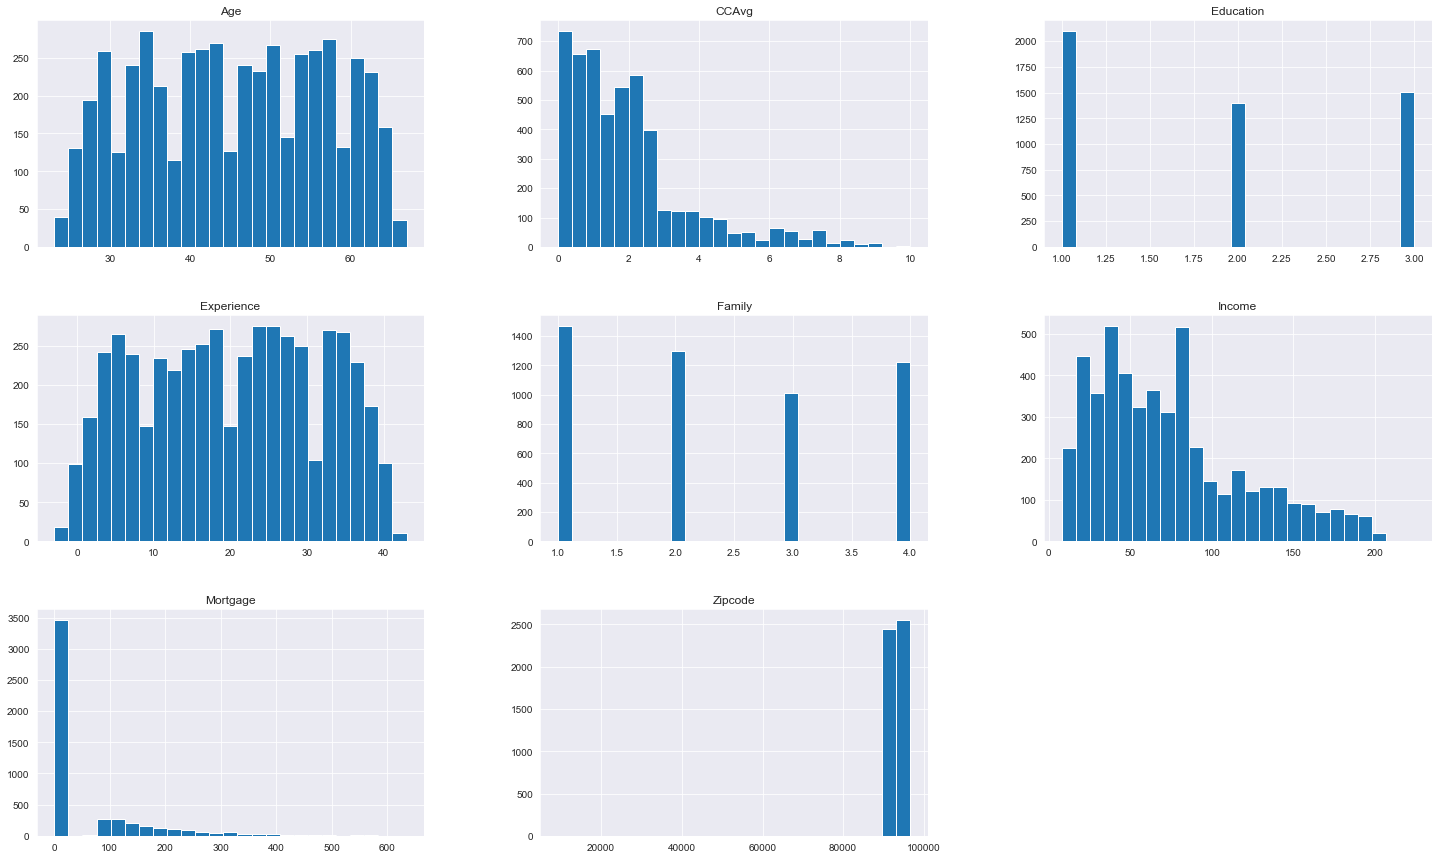

In [8]:
# Visual analysis of data including skewness
df[['Age','Experience','Income','Zipcode','Family','CCAvg','Education','Mortgage']].hist(bins=25,figsize=[25,15])

#### Inference:
1. Zipcode with that 1 incorrect data is skewed to the left by a large extent
2. CCAvg is skewed right
3. Income is skewed right
4. Rest of the continous values seem to be normally distributed 

## EDA
1. Number of unique in each column?
2. Number of people with zero mortgage?
3. Number of people with zero credit card spending per month?
4. Value counts of all categorical columns.
5. Univariate and Bivariate
6. Get data model ready

In [9]:
# Number of unique in each column?
df.nunique()

ID               5000
Age                45
Experience         47
Income            162
Zipcode           467
Family              4
CCAvg             108
Education           3
Mortgage          347
AccptPersLoan       2
HaveSecAcct         2
HaveCDAcct          2
HaveOnline          2
HaveCC              2
dtype: int64

In [10]:
# Number of people with zero mortgage?

print('Number of people with zero mortgage : ',df.ID[df.Mortgage == 0].count())

Number of people with zero mortgage :  3462


In [11]:
# Number of people with zero credit card spending per month?

print('Number of people with zero credit card spending per month : ',df.ID[df.CCAvg == 0].count())

Number of people with zero credit card spending per month :  106


In [12]:
# Value counts of all categorical columns.

for col in ['AccptPersLoan','HaveSecAcct','HaveCDAcct','HaveOnline','HaveCC','Family','Education','Experience','Zipcode'] :
    print('Value Counts of {} \n{}\n\n'.format(col,df[col].value_counts()))


Value Counts of AccptPersLoan 
0    4520
1     480
Name: AccptPersLoan, dtype: int64


Value Counts of HaveSecAcct 
0    4478
1     522
Name: HaveSecAcct, dtype: int64


Value Counts of HaveCDAcct 
0    4698
1     302
Name: HaveCDAcct, dtype: int64


Value Counts of HaveOnline 
1    2984
0    2016
Name: HaveOnline, dtype: int64


Value Counts of HaveCC 
0    3530
1    1470
Name: HaveCC, dtype: int64


Value Counts of Family 
1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64


Value Counts of Education 
1    2096
3    1501
2    1403
Name: Education, dtype: int64


Value Counts of Experience 
 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 14    127
 16    127
 30    126
 34    125
 27    125
 17    125
 29    124
 22    124
 7     121
 8     119
 6     119
 15    119
 10    118
 33    117
 13    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102


##### Univariate and Bivariate

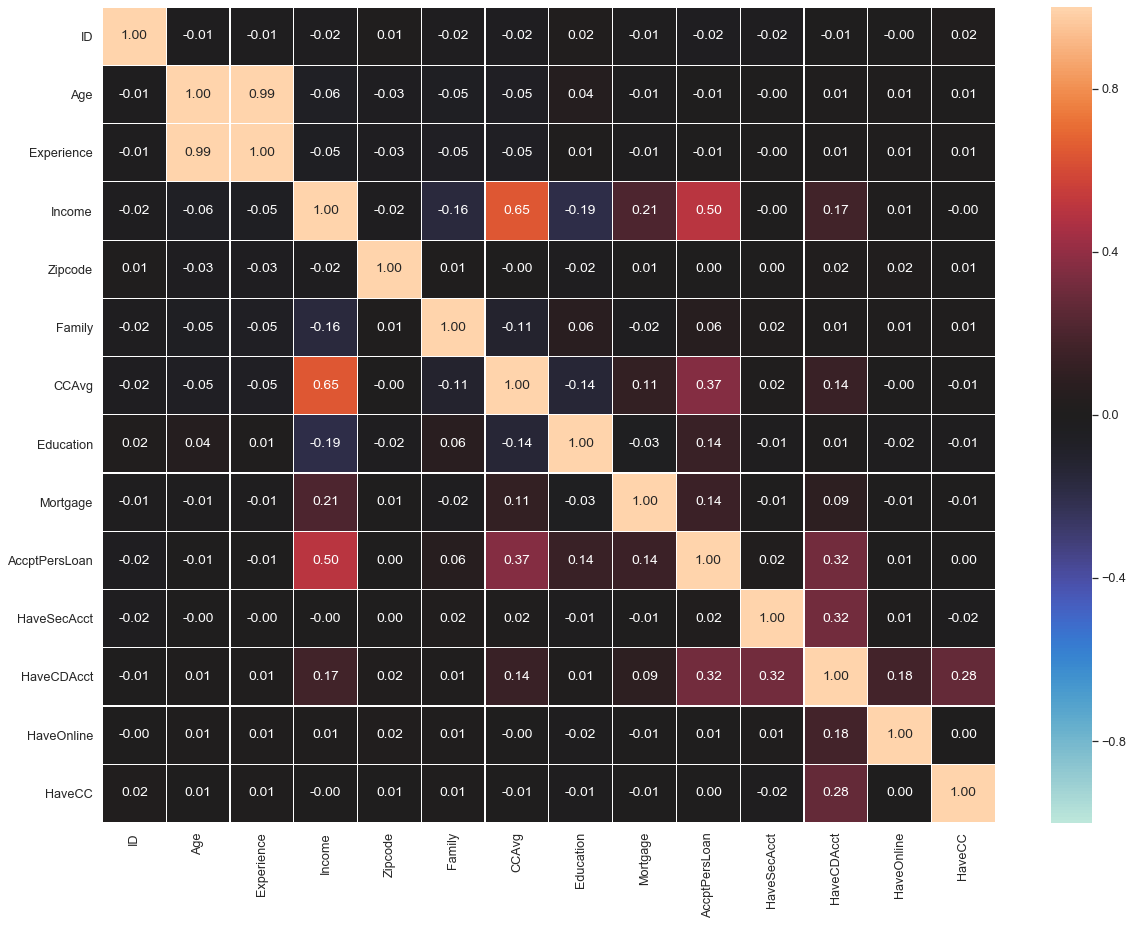

In [13]:
plt.figure(figsize=[20,15])
sns.set(font_scale=1.15)
sns.heatmap(df.corr(),annot=True,vmin=-1,vmax=1,center=0, linewidth=0.2, fmt='.2f')
plt.show()

#### Inference:
1. Obviously Age and Experience have a very strong positive linear relationship
2. Income and CCAvg have a positive linear relationship (as expected)
3. With regards to Accepting Personal Loan, from this visualition and with the data included it appears Income and CCAvg seems to be having a positive linear relationship
 - Meaning those who have higher income and having higher CCAvg seems to be accepting personal loans (habitual?!)

<br/>

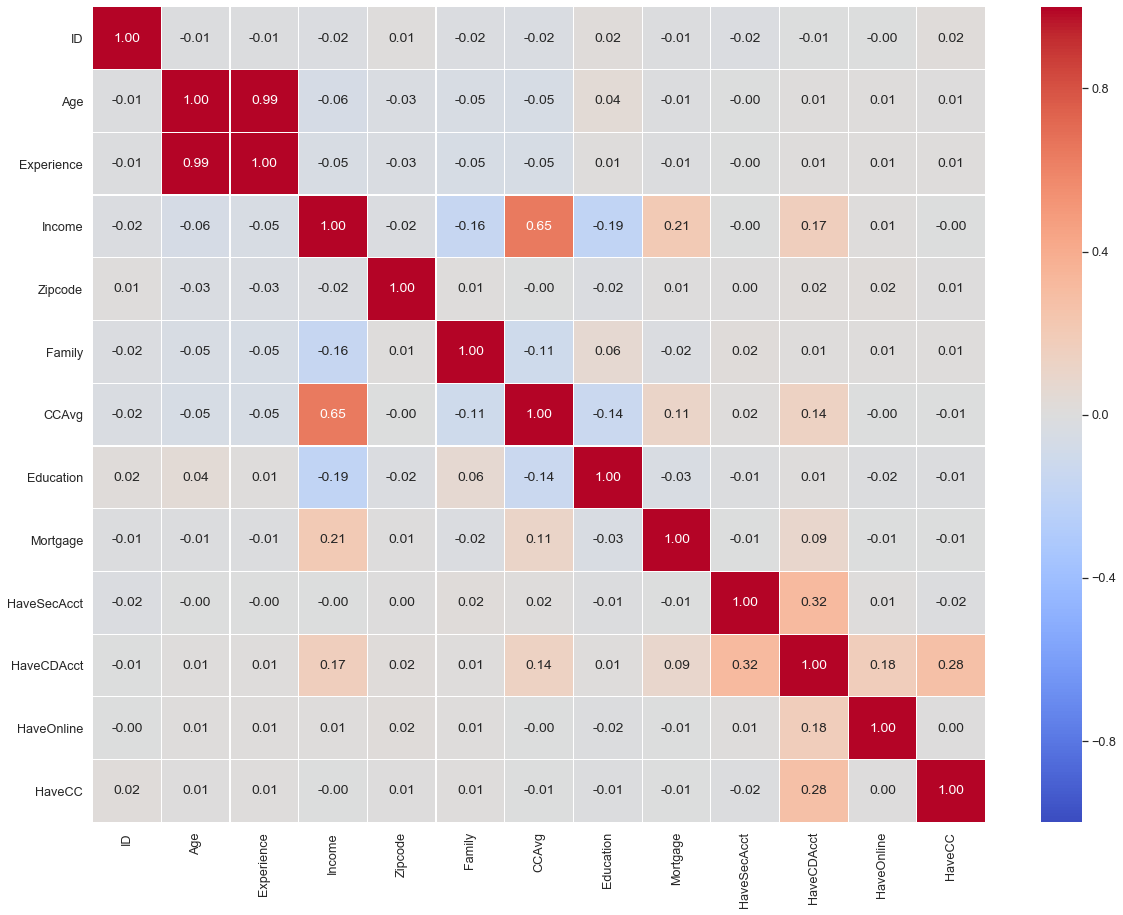

In [14]:
corr = df.drop('AccptPersLoan',axis=1).corr()
plt.figure(figsize=[20,15])
sns.set(font_scale=1.15)
sns.heatmap(corr,annot=True,vmin=-1,vmax=1,center=0, linewidth=0.2, fmt='.2f', cmap='coolwarm')
plt.show()

#### Inference:
1. Comparing the features (dropping the Dependent variable), the positive linear relationship shows but not very strong
2. Interestingly Education and CCAvg have a negative linear relationship! (maybe data issues or outliers)
3. Similartly Eduation and Incomg have a negative linear relationship! (maybe data issues or outliers)

### Getting Data-set ready

In [15]:
df.drop(df[df.Zipcode < 90000].index, inplace=True)

#### Dropping the incorrect Zipcode and checking visually (chart below)

In [53]:
fig = px.histogram(df, x='Zipcode', marginal='rug', width=1000)
fig.show()

In [17]:
df.drop(df[df.Experience < 0 ].index, inplace=True)

#### Note: Dropping observations (rows) that have Experience in negative values (data errors) and validating them (in the chart below)

In [18]:
fig = px.histogram(df, x='Experience', marginal='rug', width=1000)
fig.show()

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,"4,947.00","2,501.70","1,443.11",1.00,"1,255.50","2,498.00","3,750.50","5,000.00"
Age,"4,947.00",45.56,11.32,24.00,36.00,46.00,55.00,67.00
Experience,"4,947.00",20.33,11.31,0.00,10.50,20.00,30.00,43.00
Income,"4,947.00",73.83,46.11,8.00,39.00,64.00,98.00,224.00
Zipcode,"4,947.00","93,168.52","1,761.25","90,005.00","91,911.00","93,437.00","94,608.00","96,651.00"
Family,"4,947.00",2.39,1.15,1.00,1.00,2.00,3.00,4.00
CCAvg,"4,947.00",1.94,1.75,0.00,0.70,1.50,2.60,10.00
Education,"4,947.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"4,947.00",56.65,101.84,0.00,0.00,0.00,101.00,635.00
AccptPersLoan,"4,947.00",0.10,0.30,0.00,0.00,0.00,0.00,1.00


##### Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

In [20]:
dfy = df[['AccptPersLoan']].copy()
dfX = df.drop(['ID','AccptPersLoan'],axis=1).copy()

In [21]:
X_train, X_test, y_train, y_test = tts(dfX, dfy, test_size=0.3, random_state=1)

In [22]:
X_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"1,485.00",45.86,11.21,24.00,36.00,46.00,55.00,67.00
Experience,"1,485.00",20.63,11.21,0.00,11.00,21.00,30.00,43.00
Income,"1,485.00",72.99,45.22,8.00,39.00,63.00,94.00,224.00
Zipcode,"1,485.00","93,227.39","1,732.84","90,007.00","92,037.00","93,611.00","94,608.00","96,150.00"
Family,"1,485.00",2.38,1.16,1.00,1.00,2.00,3.00,4.00
CCAvg,"1,485.00",1.90,1.72,0.00,0.70,1.50,2.50,10.00
Education,"1,485.00",1.88,0.84,1.00,1.00,2.00,3.00,3.00
Mortgage,"1,485.00",56.93,101.27,0.00,0.00,0.00,103.00,617.00
HaveSecAcct,"1,485.00",0.10,0.30,0.00,0.00,0.00,0.00,1.00
HaveCDAcct,"1,485.00",0.07,0.25,0.00,0.00,0.00,0.00,1.00


##### Use the Logistic Regression model to predict whether the customer will take a personal loan or not.<br>Print all the metrics related to evaluating the model performance (accuracy, recall, precision, f1score, and roc_auc_score). <br>Draw a heatmap to display confusion matrix (15 marks)

In [23]:
logit.fit(X_train,y_train)
print('Training score : ',logit.score(X_train, y_train))

logit.fit(X_test,y_test)
print('Test score : ',logit.score(X_test, y_test))

Training score :  0.9459849797804737
Test score :  0.9569023569023569


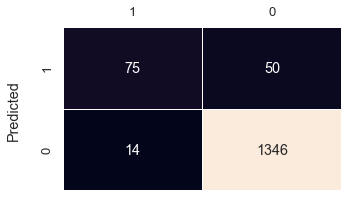

In [24]:
y_predict = logit.predict(X_test)
cmat = mtr.confusion_matrix(y_test,y_predict, labels=[1,0])

dfcm = pd.DataFrame(cmat, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

In [25]:
npcm = np.array(cmat)
print('Accuracy of the model : ',npcm.trace()/npcm.sum())
print('Recall of the model : ',npcm[0,0]/npcm[:,0].sum())
print('Precision of the model : ',npcm[0,0]/npcm[0].sum())

Accuracy of the model :  0.9569023569023569
Recall of the model :  0.8426966292134831
Precision of the model :  0.6


In [26]:
appr0 = np.array([[npcm.trace()/npcm.sum()],[npcm[0,0]/npcm[:,0].sum()],[npcm[0,0]/npcm[0].sum()]])
appr0

array([[0.95690236],
       [0.84269663],
       [0.6       ]])

#### Alternate Approach 1

In [27]:
df1 = df.copy()
df1['HasMortgage'] = df1.Mortgage.apply(lambda x : 1 if( x > 0) else 0)

#### Note: 
1. Introducing a Categorical variable 'HasMortgage' similar to other categorical variables before applying transformation
2. Given the extreme skewness of Mortgage amounts, applying a Log transformation

In [28]:
df1.Mortgage = df1.Mortgage.apply(lambda x: 1 if(x == 0) else x)

df1['Mortgage_Log'] = np.log(df1.Mortgage)

fig = px.box(df1, x='Mortgage', width=1000, height=200)
fig.show()

fig = px.box(df1, x='Mortgage_Log', width=1000, height=200)
fig.show()

In [29]:
dfy1 = df1[['AccptPersLoan']].copy()
dfX1 = df1.drop(['ID','AccptPersLoan','Mortgage'],axis=1).copy()

In [30]:
X1_train, X1_test, y1_train, y1_test = tts(dfX1, dfy1, test_size=0.3, random_state=30)

In [31]:
y1_train.AccptPersLoan.value_counts(normalize=True)*100

0   89.83
1   10.17
Name: AccptPersLoan, dtype: float64

In [32]:
logit.fit(X1_train,y1_train)
print('Training score : ',logit.score(X1_train, y1_train))

logit.fit(X1_test,y1_test)
print('Test score : ',logit.score(X1_test, y1_test))

Training score :  0.950895436164067
Test score :  0.9535353535353536


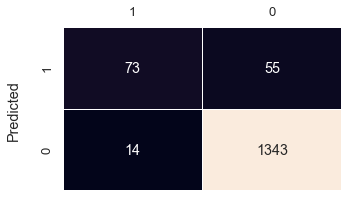

In [33]:
y1_predict = logit.predict(X1_test)
cmat1 = mtr.confusion_matrix(y1_test,y1_predict, labels=[1,0])

dfcm1 = pd.DataFrame(cmat1, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm1, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

In [34]:
npcm1 = np.array(cmat1)
print('Accuracy of the model : ',npcm1.trace()/npcm1.sum())
print('Recall of the model : ',npcm1[0,0]/npcm1[:,0].sum())
print('Precision of the model : ',npcm1[0,0]/npcm1[0].sum())

Accuracy of the model :  0.9535353535353536
Recall of the model :  0.8390804597701149
Precision of the model :  0.5703125


In [35]:
appr1 = np.array([[npcm1.trace()/npcm1.sum()],[npcm1[0,0]/npcm1[:,0].sum()],[npcm1[0,0]/npcm1[0].sum()]])
appr1

array([[0.95353535],
       [0.83908046],
       [0.5703125 ]])

#### Alternate Approach 2

In [36]:
df2 = df.copy()

In [37]:
dfy2 = df2[['AccptPersLoan']].copy()
dfX2 = df2.drop(['ID','AccptPersLoan'],axis=1).copy()

In [38]:
dfX2 = pd.get_dummies(dfX2,columns=['Family','Education'])
dfX2.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,"4,947.00",45.56,11.32,24.00,36.00,46.00,55.00,67.00
Experience,"4,947.00",20.33,11.31,0.00,10.50,20.00,30.00,43.00
Income,"4,947.00",73.83,46.11,8.00,39.00,64.00,98.00,224.00
Zipcode,"4,947.00","93,168.52","1,761.25","90,005.00","91,911.00","93,437.00","94,608.00","96,651.00"
CCAvg,"4,947.00",1.94,1.75,0.00,0.70,1.50,2.60,10.00
Mortgage,"4,947.00",56.65,101.84,0.00,0.00,0.00,101.00,635.00
HaveSecAcct,"4,947.00",0.10,0.31,0.00,0.00,0.00,0.00,1.00
HaveCDAcct,"4,947.00",0.06,0.24,0.00,0.00,0.00,0.00,1.00
HaveOnline,"4,947.00",0.60,0.49,0.00,0.00,1.00,1.00,1.00
HaveCC,"4,947.00",0.29,0.46,0.00,0.00,0.00,1.00,1.00


In [39]:
X2_train, X2_test, y2_train, y2_test = tts(dfX2, dfy2, test_size=0.3, random_state=30)

In [40]:
y2_train.AccptPersLoan.value_counts(normalize=True)*100

0   89.83
1   10.17
Name: AccptPersLoan, dtype: float64

In [41]:
logit.fit(X2_train,y2_train)
print('Training score : ',logit.score(X2_train, y2_train))

logit.fit(X2_test,y2_test)
print('Test score : ',logit.score(X2_test, y2_test))

Training score :  0.9610051993067591
Test score :  0.9636363636363636


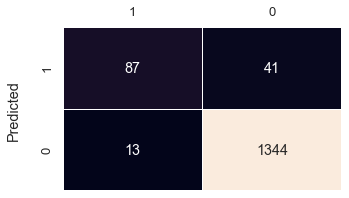

In [42]:
y2_predict = logit.predict(X2_test)
cmat2 = mtr.confusion_matrix(y2_test,y2_predict, labels=[1,0])

dfcm2 = pd.DataFrame(cmat2, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm2, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

In [43]:
npcm2 = np.array(cmat2)
print('Accuracy of the model : ',npcm2.trace()/npcm2.sum())
print('Recall of the model : ',npcm2[0,0]/npcm2[:,0].sum())
print('Precision of the model : ',npcm2[0,0]/npcm2[0].sum())

Accuracy of the model :  0.9636363636363636
Recall of the model :  0.87
Precision of the model :  0.6796875


In [44]:
appr2 = np.array([[npcm2.trace()/npcm2.sum()],[npcm2[0,0]/npcm2[:,0].sum()],[npcm2[0,0]/npcm2[0].sum()]])
appr2

array([[0.96363636],
       [0.87      ],
       [0.6796875 ]])

### Summary:
Comparing the results of the three approaches:

In [45]:
compare = pd.DataFrame('',index=['Accuracy','Recall','Precision'],columns=['Approach0','Approach1','Approach2'])

In [46]:
compare.Approach0 = appr0
compare.Approach1 = appr1
compare.Approach2 = appr2
pd.options.display.float_format = '{:,.4f}'.format  
compare

,Approach0,Approach1,Approach2
Accuracy,0.9569,0.9535,0.9636
Recall,0.8427,0.8391,0.8700
Precision,0.6000,0.5703,0.6797


### Approach2 seems to have the best results for the given data and model
<br/>

### Another variation with Approach2 by comparing the Logit models with class_weight included or not...

Training score :  0.9610051993067591
Test score :  0.9636363636363636


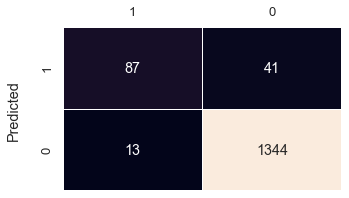

Training score :  0.9078567302137492
Test score :  0.9151515151515152


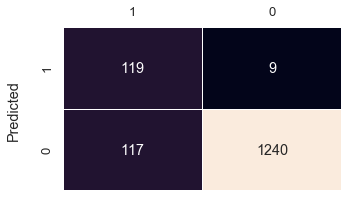

In [47]:
logit1 = LogisticRegression(solver='newton-cg')
logit2 = LogisticRegression(solver='newton-cg', class_weight='balanced')

logit1.fit(X2_train,y2_train)
print('Training score : ',logit1.score(X2_train, y2_train))

logit1.fit(X2_test,y2_test)
print('Test score : ',logit1.score(X2_test, y2_test))

y21_predict = logit1.predict(X2_test)
cmat21 = mtr.confusion_matrix(y2_test,y21_predict, labels=[1,0])
dfcm21 = pd.DataFrame(cmat21, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm21, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

logit2.fit(X2_train,y2_train)
print('Training score : ',logit2.score(X2_train, y2_train))

logit2.fit(X2_test,y2_test)
print('Test score : ',logit2.score(X2_test, y2_test))

y22_predict = logit2.predict(X2_test)
cmat22 = mtr.confusion_matrix(y2_test,y22_predict, labels=[1,0])
dfcm22 = pd.DataFrame(cmat22, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm22, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

### Comparing the three approaches...
1. In this business context of the need to maximize the target segment which will accept Personal Loan, it is alright to have more False Positives than more False Negatives 
2. Meaning it is alright to reach out to more customers (though their likelihood of accepting personal loans is low) offering them Personal Loan than excluding potential customers (who are more likely to accept Personal Loans) from the campaigns 

### ...hence the model without the 'balanced' class_weight is the right fit for this usecase

<br/>


##### Find out coefficients of all the attributes and show the output in a data frame with column names? <br> For test data show all the rows where the predicted class is not equal to the observed class. (10 marks)

In [48]:
logit = LogisticRegression(solver='newton-cg')
logit.fit(X2_test,y2_test)

dfcoef = pd.DataFrame({'Attributes':list(X2_test.columns),'Coefficient':list(logit.coef_[0])})
dfcoef

,Attributes,Coefficient
0,Age,0.0875
1,Experience,-0.0909
2,Income,0.0623
3,Zipcode,-0.0001
4,CCAvg,0.0310
5,Mortgage,0.0010
6,HaveSecAcct,-0.5431
7,HaveCDAcct,3.2042
8,HaveOnline,-0.2573
9,HaveCC,-0.9225


In [49]:
y2_predict = logit.predict(X2_test)
dfpred = pd.DataFrame({'Actual':(list(y2_test.AccptPersLoan)),'Predicted':list(y2_predict)})
dfpred[dfpred.Actual != dfpred.Predicted]

,Actual,Predicted
22,1,0
57,1,0
59,1,0
65,1,0
147,1,0
161,1,0
239,0,1
349,1,0
361,1,0
376,0,1


In [50]:
dfpred[dfpred.Actual != dfpred.Predicted].groupby(['Actual','Predicted'])['Predicted'].agg('count')

Actual  Predicted
0       1            13
1       0            41
Name: Predicted, dtype: int64

##### Give conclusion related to the Business understanding of your model? (5 marks)

In [51]:
dfcoef.sort_values('Coefficient', ascending=False)

,Attributes,Coefficient
7,HaveCDAcct,3.2042
16,Education_3,1.4566
15,Education_2,1.2295
13,Family_4,0.9895
12,Family_3,0.4888
0,Age,0.0875
2,Income,0.0623
4,CCAvg,0.0310
5,Mortgage,0.0010
3,Zipcode,-0.0001


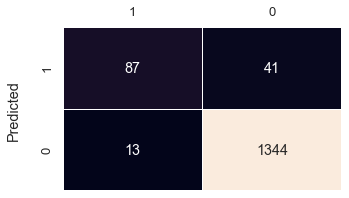

In [52]:
cmat2 = mtr.confusion_matrix(y2_test,y2_predict, labels=[1,0])

dfcm2 = pd.DataFrame(cmat2, index=['1','0'],columns=['1','0'])
plt.figure(figsize=[5,3])
# sns.set(font_scale=1.2)
fig = sns.heatmap(dfcm2, annot=True, fmt='d',linewidth=0.5, cbar=False)
plt.tick_params(axis='both', which='major', labelbottom = False, bottom=False, top = False, labeltop=True)
plt.ylabel('Predicted\n')
plt.show()

### Based on the above two data-points:

#### Ranking of factors which contribute to customers more likely to accept Personal Loans
1. Having a 'Certificate of Deposit' Account (CD Account) - maybe having a safetynet in that deposit to repay for the personal loan
2. Higher the education (Professional/Graduate) - maybe better understanding of how personal loan works  & also the need for additional funds to complete their education!
3. Having a larger family entails more unforeseen expenses and hence the likelihood of accepting the personal loans
4. Age, Income and Credit card average spend also have a positive  relationship to customers accepting personal loans but not as highly ranked as the factors 1 to 3

#### Ranking of factors which contribute to customers NOT likely to accept Personal Loans
1. Having smaller family - maybe there aren't unplanned expenses hitting them and hence not likely to take loans
2. Lower education seems to be the biggest factor (given the data) that negates customers taking loans

#### Based on the confusion matrix,
1. The model is built for minimizing the 'False Negatives', aka misclassification of customers likely to get loans as the ones not likely - thereby maximizing the chances of the bank going after the right segment of customers
2. There could be larger rejections given the model is relaxed on 'False Positives' - customers turning down the offer for Personal Loans offered compared to other models for identifying the target customers.
